In [1]:
"""Gaussian Mixtures for Anomaly Detection"""
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

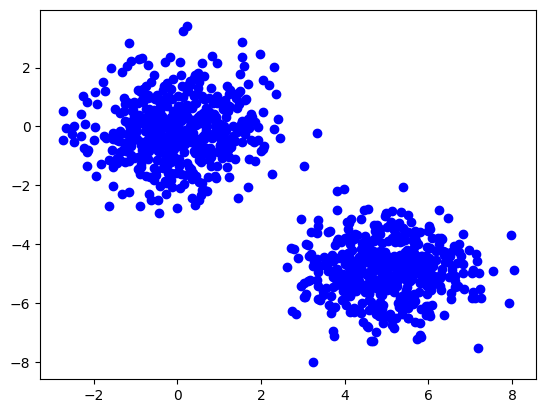

In [2]:
x1, y1 = make_blobs(n_samples=1000,
                   centers=((5,-5),(0,0)))
plt.scatter(x1[:,0],x1[:,1],color='b')
plt.show()

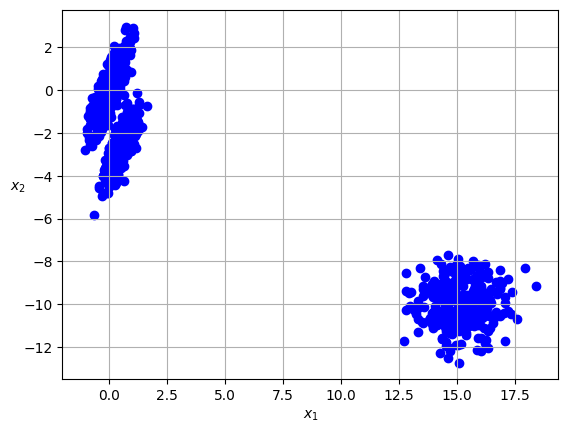

In [3]:
x1 = x1.dot(np.array([[0.3, 0.30], [0.20, 0.85]]))
x2, y2 = make_blobs(n_samples=300, centers=1)
x2 = x2 + [7, -9]
x = np.r_[x1,x2]
y = np.r_[y1,y2]
plt.scatter(x[:,0],x[:,1],color='b')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$",rotation=0)
plt.grid()
plt.show()

In [4]:
# I'll train a Gaussian mixture model on dataset:
gm = GaussianMixture(
    n_components=3,n_init=10
)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10)

In [5]:
'''I can estimate the density of the model at any given location. for each instance it is given,
 this estimates the log of the probability density function (PDF) at that location. The greater
 the score, the higher the density'''
gm.score_samples(x)

array([-1.74430884, -1.16853443, -1.13109155, ..., -3.31211008,
       -3.31062663, -3.37364239])

In [6]:
from matplotlib.colors import LogNorm
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        threshold = weights.max() / 10
        centroids = centroids[weights > threshold]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_gaussian_mixture(cluster,x,resolution = 100,show_ylabels=True):

  pieces = 100
  xmin = x.min(axis=0) - 0.1
  xmax = x.max(axis=0) + 0.1
  xhor = np.linspace(xmin[0],xmax[0],pieces)
  xver = np.linspace(xmin[1],xmax[1],pieces)
  xv,yv = np.meshgrid(xhor,xver)
  z1 = -cluster.score_samples(np.c_[xv.ravel(),yv.ravel()])
  z1=z1.reshape(xv.shape)
  plt.contourf(xv, yv, z1,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
  plt.contour(xv, yv, z1,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')
  plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2) # data points
  z2 = cluster.predict(np.c_[xv.ravel(),yv.ravel()])
  z2 = z2.reshape(xv.shape)
  plt.contour(xv,yv,z2,
              linewidths=1.5, colors='r', linestyles='dashed')
  plot_centroids(cluster.means_,weights=cluster.weights_)
  plt.xlabel("$x_1$")
  if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)

In [7]:
# Anomaly Detection - let's find anomalies first
densities = gm.score_samples(x)
# define a threshold density below which an instance becomes an anomaly
density_threshold = np.percentile(densities,2)
anomalies = x[densities < density_threshold]

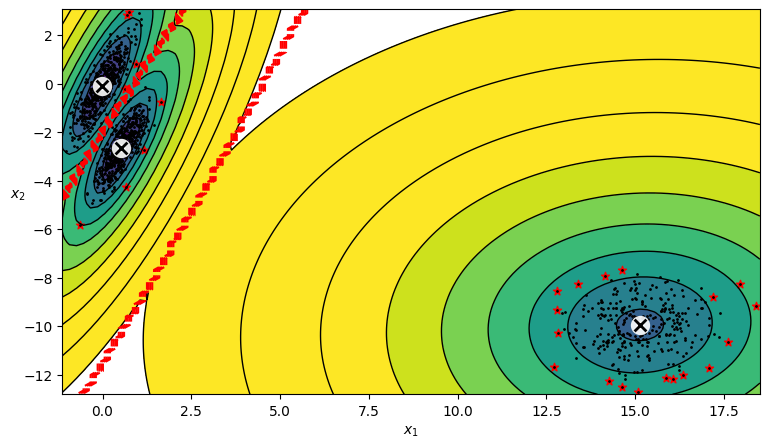

In [8]:
# I will now plot those anomalies with red stars
plt.figure(figsize=(9, 5))
plot_gaussian_mixture(gm,x)
plt.scatter(anomalies[:,0],anomalies[:,1],
            c='r',marker='*')
plt.show()

In [ ]:
'''Selecting the Number of Clusters
Equation 1:

Bayesian Information Criterion (BIC):
\[ \text{BIC} = k \log(n) - 2 \log(\hat{L}) \]

Akaike Information Criterion (AIC):
\[ \text{AIC} = 2k - 2 \log(\hat{L}) \]

Where:
- \( k \) is the number of parameters in the model.
- \( n \) is the number of data points.
- \( \hat{L} \) is the maximum value of the likelihood function of the model given the data.

While k-means clustering allows for the use of inertia or silhouette score to determine the
optimal number of clusters, Gaussian mixture models present a different challenge. In the
case of Gaussian mixtures, relying on metrics like inertia or silhouette score can be
unreliable due to the potential presence of non-spherical clusters or clusters of varying
 sizes. Instead, practitioners often turn to theoretical information criteria such as the
 Bayesian information criterion (BIC) or the Akaike information criterion (AIC) to select
 the most suitable model. These criteria, expressed in Equation 1 above, provide a means to
  assess model fit by balancing the complexity of the model (as represented by the number
   of parameters) against its goodness of fit to the data.'''

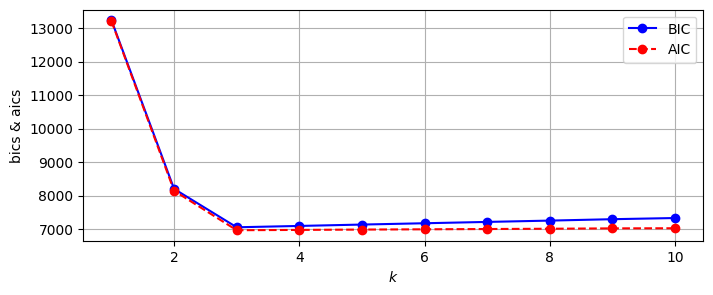

In [16]:
gm_foreachk = [GaussianMixture(n_components=k,n_init=10).fit(x)
for k in range(1,11) ]
gm_bic = [each.bic(x) for each in gm_foreachk]
gm_aic = [each.aic(x) for each in gm_foreachk]
plt.figure(figsize=(8, 3))
plt.xlabel("$k$")
plt.ylabel("bics & aics")
plt.grid()
k_values = range(1,11)
plt.plot(k_values, gm_bic, "bo-", label="BIC")
plt.plot(k_values, gm_aic, "ro--", label="AIC")
plt.legend()
plt.show()

In [ ]:
'''Conclusion
The plot reaches a minimum at k=3 on both graphs
so the optimal solution is 3 clusters as expected
'''